In [13]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

Tabelle erstellen:

In [14]:
md = pd.read_csv('tables/md.csv')
md1 = md.iloc[:, [0,1]]
#print(md1.to_latex(index = False, column_format= "c c", decimal=',')) 

#### Aufgabenteil a)

Daten auswerten:

In [15]:
np.savetxt('tables/a.txt', md1.values, header='U/V N', fmt='%.3f')
U, N = np.genfromtxt('tables/a.txt', unpack=True, skip_header=1)
# Plateaubereich 380 - 620 V
Up = U[5:30]
Np = N[5:30]
Np = Np/120

# Ausgleichsgerade
def g(u, a, b):
    return a * u + b

para, pcov = curve_fit(g, Up, Np)
a, b = para
pcov = sqrt(np.diag(pcov))
fa, fb = pcov 

Fehler berechnen:

In [16]:
ua = ufloat(a, fa)
ub = ufloat(b, fb)
print('a = (%.3f ± %.3f)' % (noms(ua), stds(ua)))
print('b = (%.3f ± %.3f)' % (noms(ub), stds(ub)))

a = (0.013 ± 0.003)
b = (100.018 ± 1.417)


Plot erstellen:

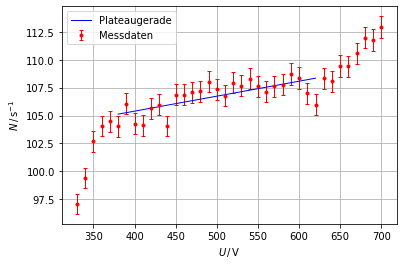

In [17]:
xx = np.linspace(380, 620, 10000)   # Spannungen für das Plateau-Gebiet
fN = sqrt(N)                        # N Poisson-verteilt
uN = uarray(N, fN)
uN = uN/120                         # Impulsrate mit Fehler
plt.errorbar(U, noms(uN), yerr = stds(uN), fmt='r.', elinewidth = 1, capsize = 2, label = 'Messdaten')
plt.plot(xx, g(xx, a, b), '-b', linewidth = 1, label = 'Plateaugerade')

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$N \, / \, \mathrm{s^{-1}}$')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style

Güte des Geiger-Müller-Zählrohrs in % pro 100 V:

In [18]:
M = (1 - (ua * 400 + ub)/(ua * 500 + ub))*100
print('M = (%.3f ± %.3f)' % (noms(M), stds(M)))

M = (1.259 ± 0.247)


#### Aufgabenteil b)

In [19]:
# Peak zu Peak ablesen
T_nach = 5.8 * 50
print('T_Nachentladung =', T_nach, 'μs') 

T_Nachentladung = 290.0 μs


#### Aufgabenteil c)
Bestimmung der Tot-Zeit (Zwei-Quellen-Methode):

In [28]:
def T(n1, n2, n12):
    return (n1 + n2 - n12)/(2*n1*n2)

# Zählraten und Poissonfehler der Quellen
t = 120      # Integrationszeit ind s

N1 = 1334
fN1 = sqrt(N1)
uN1 = ufloat(N1, fN1)
uN1 = uN1/t
print('N1 = (%.3f ± %.3f)' % (N1, fN1))

N2 = 21994
fN2 = sqrt(N2)
uN2 = ufloat(N2, fN2)
uN2 = uN2/t
print('N2 = (%.3f ± %.3f)' % (N2, fN2))

N12 = 23182
fN12 = sqrt(N12)
uN12 = ufloat(N12, fN12)
uN12 = uN12/t
print('N12 = (%.3f ± %.3f)' % (N12, fN12))

# Totzeit berechnen
T = T(uN1, uN2, uN12)
print(T)
print('T_tot =', T*1e6, 'μs')


N1 = (1334.000 ± 36.524)
N2 = (21994.000 ± 148.304)
N12 = (23182.000 ± 152.256)
0.0003+/-0.0004
T_tot = (3+/-4)e+02 μs


Oszilloskop-Methode:

In [21]:
# Peak zu Null ablesen
T_Tot = 4.8 * 50
print('Tot =', T_Tot, 'μs') 

Tot = 240.0 μs


#### Aufgabenteil d)
Freigesetzte Ladungen:

In [22]:
md2 = md.iloc[:, [1, 2]]
np.savetxt('tables/b.txt', md2.values, header='N I/μA', fmt='%.3f')
N, I = np.genfromtxt('tables/b.txt', unpack=True, skip_header=1)
t = 120      # Integrationszeit in s 

# einfallende Teilchen
e = const.e
def z(i, n):
    return i/(e*n)

fI = 0.05       # Fehler des Stroms in μA
uI = uarray(I, fI)

fN = sqrt(N)
uN = uarray(N, fN)
uN = uN/t

Z = z(uI, uN)


Plot der freigesetzen Ladungen:

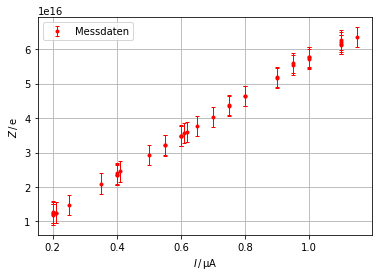

In [23]:
plt.errorbar(I, noms(Z), yerr = stds(Z), fmt='r.', elinewidth = 1, capsize = 2, label = 'Messdaten')

plt.xlabel(r'$I \, / \, \mathrm{μA}$')
plt.ylabel(r'$Z \, / \, \mathrm{e}$')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style

In [24]:
uN = uN/t       # Impulsrate
f = {'I/μA': uI, 'N': uN, 'Z/e*10**-16': Z*1e-16}
df = pd.DataFrame(data = f)

df = df.iloc[[2, 7, 11, 12, 16, 21, 25, 27, 32, 37],:]
print(df.to_latex(index = False, column_format= "c c c", decimal=','))

\begin{tabular}{c c c}
\toprule
       I/μA &             N & Z/e*10**-16 \\
\midrule
0.20+/-0.05 & 0.856+/-0.008 & 1.22+/-0.30 \\
0.35+/-0.05 & 0.869+/-0.008 & 2.10+/-0.30 \\
0.41+/-0.05 & 0.867+/-0.008 & 2.46+/-0.30 \\
0.50+/-0.05 & 0.891+/-0.008 & 2.92+/-0.29 \\
0.60+/-0.05 & 0.900+/-0.008 & 3.47+/-0.29 \\
0.70+/-0.05 & 0.902+/-0.008 & 4.03+/-0.29 \\
0.80+/-0.05 & 0.898+/-0.008 & 4.63+/-0.29 \\
0.90+/-0.05 & 0.903+/-0.008 & 5.18+/-0.29 \\
1.00+/-0.05 & 0.912+/-0.008 & 5.70+/-0.29 \\
1.15+/-0.05 & 0.941+/-0.008 & 6.36+/-0.28 \\
\bottomrule
\end{tabular}

